# Modelo Suavização exponencial

Utilizando modelo de suavização exponencial para prever preço do óleo na Arabia Saudita

* Importando bibliotecas

In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt

* Lendo arquivo Excel

In [2]:
dados = pd.read_csv('Passageiros.csv')

* Exibindo cinco primeiras linhas

In [3]:
dados.head()

,ID,Datetime,Count
0,0,25-08-2012 00:00,8
1,1,25-08-2012 01:00,2
2,2,25-08-2012 02:00,6
3,3,25-08-2012 03:00,2
4,4,25-08-2012 04:00,2


* Removendo coluna ID

In [4]:
dados = dados.drop('ID',axis=1)

* Convertendo  data

In [5]:
dados['Datetime'] = pd.to_datetime(dados['Datetime'])

* Definindo ano como índice

In [6]:
dados = dados.set_index('Datetime')

* Total de passageiros por dia

In [7]:
dados =  dados.resample('D').sum()
dados = dados.dropna()

* Graficando série temporal

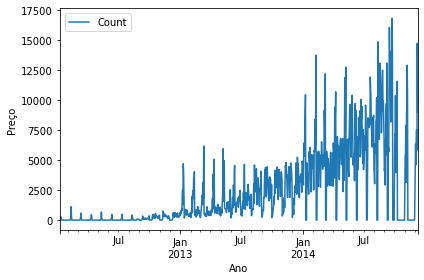

In [8]:
dados.plot()
plt.xlabel('Ano')
plt.ylabel('Preço')
plt.tight_layout()

* Criando amostras de treino e teste

In [9]:
t_treino = dados[dados.index<'2014-06-01'].index.values
t_teste = dados[dados.index>='2014-06-01'].index.values
X_treino = dados[dados.index<'2014-06-01'].values
X_teste = dados[dados.index>='2014-06-01'].values

* Aplicando modelo Exponential Smoothing

In [10]:
from statsmodels.tsa.api import ExponentialSmoothing

In [11]:
fit_alpha_02 = ExponentialSmoothing(X_treino).fit(smoothing_level=0.2)
fit_alpha_02 = fit_alpha_02.forecast(len(X_teste))

fit_alpha_05 = ExponentialSmoothing(X_treino).fit(smoothing_level=0.5)
fit_alpha_05 = fit_alpha_05.forecast(len(X_teste))

fit_alpha_09 = ExponentialSmoothing(X_treino).fit(smoothing_level=0.9)
fit_alpha_09 = fit_alpha_09.forecast(len(X_teste))

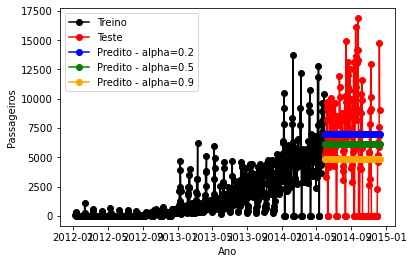

In [12]:
plt.plot(t_treino,X_treino, marker='o', color='black',label='Treino')
plt.plot(t_teste,X_teste, marker='o', color='red',label='Teste')
plt.plot(t_teste,fit_alpha_02, marker='o', color='blue',label='Predito - alpha=0.2')
plt.plot(t_teste,fit_alpha_05, marker='o', color='green',label='Predito - alpha=0.5')
plt.plot(t_teste,fit_alpha_09, marker='o', color='orange',label='Predito - alpha=0.9')
plt.xlabel('Ano')
plt.ylabel('Passageiros')
plt.legend()

* Calculando erros

In [13]:
from sklearn.metrics import mean_squared_error

In [14]:
MSE_alpha02 = mean_squared_error(X_teste,fit_alpha_02)
MSE_alpha05 = mean_squared_error(X_teste,fit_alpha_05)
MSE_alpha09 = mean_squared_error(X_teste,fit_alpha_09)

In [15]:
RMSE_alpha02 = np.sqrt(MSE_alpha02)
RMSE_alpha05 = np.sqrt(MSE_alpha05)
RMSE_alpha09 = np.sqrt(MSE_alpha09)

In [16]:
print("RMSE (alpha=0.2) = {:0.2f}".format(RMSE_alpha02))
print("RMSE (alpha=0.5) = {:0.2f}".format(RMSE_alpha05))
print("RMSE (alpha=0.9) = {:0.2f}".format(RMSE_alpha09))

RMSE (alpha=0.2) = 4692.91
RMSE (alpha=0.5) = 4488.01
RMSE (alpha=0.9) = 4494.83
